
## TESTE 01

Este pequeno teste aborda a aplicação do método do Gradiente para a minimização
de uma função multivariável. O problema de otimização abordado é o seguinte:

    Minimizar f(x) = sin(x1+x2) + (x1-x2)^2 - 1.5*x1 + 2.5*x2 + 1

O desafio neste teste é implementar a fórmula para estimar o gradiente de uma
função multivariável. Basta apenas completar a linha 34 com ou a fórmula da
diferença progressiva ou da diferença regressiva ou da diferença central. Não é
permitido utilizar o cálculo analítico do gradiente.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
from numpy.linalg import norm
plt.rcParams.update({'font.size': 15})

In [ ]:
# Calculo numérico das derivadas
def gradiente(x, fx, func, delta=1e-10):

    # Inicializa o vetor gradiente
    grad = np.zeros(x.size)
    
    # Para cada variável
    for n in range(x.size):
        
        # Vetor com 1 na posição da variável onde a derivada será calculada
        e = np.zeros(x.size)
        e[n] = 1
        
        """ 
        A derivada é calculada pela diferença central, ou seja:
        f'(x) = (f(x + delta * e) - f(x - delta * e)) / (2 * delta)
        onde delta é um pequeno número que aproxima a derivada.
        A função func é chamada com o vetor x modificado por delta * e,
        que representa um pequeno deslocamento na direção da variável n.
        O vetor e é um vetor unitário que indica a direção da variável n.
        O vetor x é o ponto onde a derivada é calculada.
        A função func é a função objetivo que estamos otimizando.
        """
        grad[n] = (func(x + delta * e) - func(x - delta * e)) / (2 * delta)
            
    return grad

# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]
    return np.sin(x1+x2) + (x1-x2)**2 - 1.5*x1 + 2.5*x2 + 1

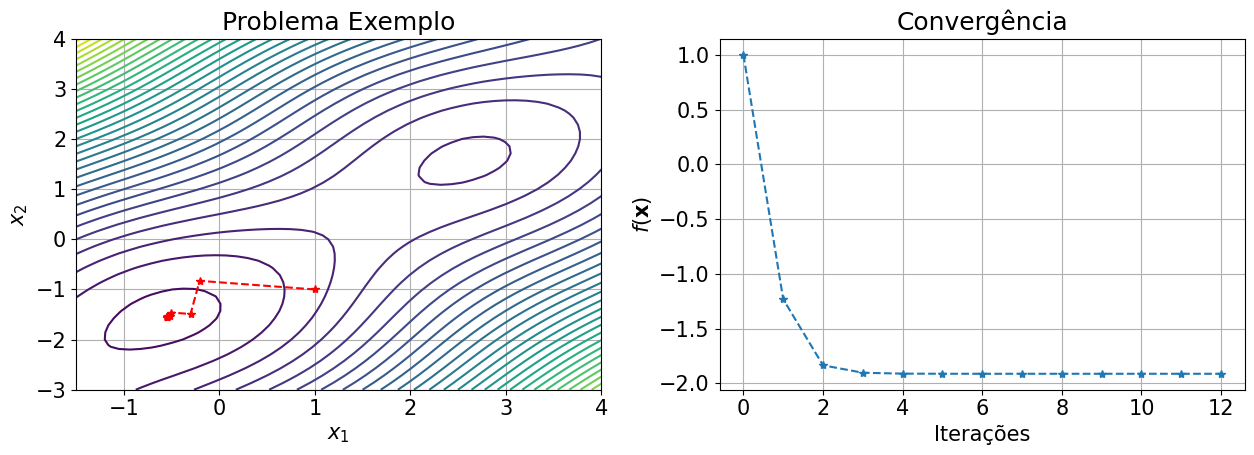

In [4]:
# Parametros iniciais
x0 = np.array([1, -1], dtype=float) # Ponto inicial

# Definição inicial das variáveis do processo iterativo
x = x0
fx = func(x0)
xhist = [np.copy(x0)]
fxhist = [fx]
k = 0
    
while True:
        
    # Calcula gradiente
    grad = gradiente(x, fx, func, delta=1e-5)

    # Define a direção de busca
    d = -grad
        
    # A função que representará nossa otimização unidimensional
    def theta(alpha):
        fx = func(x + alpha*d)
        return fx

    # Otimização unidimensional para determinar o passo na direção d
    alpha = opt.minimize_scalar(theta, method='golden').x
        
    # Atualiza
    x = x + alpha*d
    fx = func(x)
    k += 1
        
    xhist.append(np.copy(x))
    fxhist.append(fx)

    if norm(grad) < 1e-4:
        break

xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-1.5, 4),
                     np.linspace(-3, 4))
f = np.zeros(x1.shape)

# Avalia função para plotar contorno
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        f[i, j] = func([x1[i, j], x2[i, j]])
        

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()